In [2]:
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

In [3]:
# Read the csv file into dataframe
df = pd.read_csv("data/train.csv")

In [4]:
# look at the hed of df
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# groupby df by pclass and sex
grouped_class_sex = (
    df[df["Survived"] == 1]
    .groupby(["Pclass", "Sex"])
    .size()
    .reset_index()
    .rename(columns={0: "Count"})
)
grouped_class_sex

,Pclass,Sex,Count
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


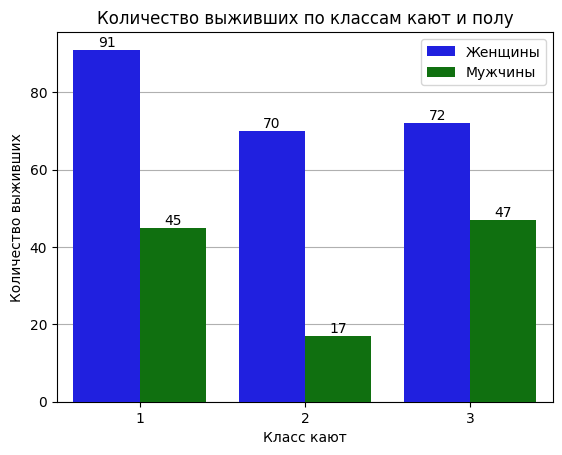

In [6]:
# Method # 1. Seaborn: work with init df via estimator attribute to aggregate
barplot = sns.barplot(
    data=df,
    x="Pclass",
    y="Survived",
    hue="Sex",
    estimator="sum",
    errorbar=None,
    palette=["blue", "green"],
    zorder=3,
)

barplot.set_title("Количество выживших по классам кают и полу")
barplot.set_xlabel("Класс кают")
barplot.set_ylabel("Количество выживших")
barplot.bar_label(barplot.containers[0], fontsize=10)
barplot.bar_label(barplot.containers[1], fontsize=10)
barplot.legend(["Женщины", "Мужчины"])
barplot.grid(axis="y", zorder=0)
plt.savefig("data/titanic.png")

In [17]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [33]:
# Method # 2. Altair library
df_rus = df.copy()
df_rus["Sex"] = df_rus["Sex"].apply(lambda x: "женщина" if x == "female" else "мужчина")
base = (
    alt.Chart(df_rus)
    .encode(
        alt.X("Sex:O").title("Пол"),
        alt.Y("sum(Survived):Q").title("Количество выживших"),
        alt.Color("Sex:N").title("Пол"),
        alt.Text("sum(Survived):Q"),
    )
    .properties(width=200)
)

chart = (
    alt.layer(base.mark_bar(), base.mark_text(dy=-10))
    .facet(alt.Column("Pclass:N").title("Класс каюты"))
    .configure_facet(spacing=0)
    .properties(title="Количество выживших по классам кают и полу")
)
chart = chart.configure_title(fontSize=20, font="Courier", anchor="start", color="gray")
chart

alt.FacetChart(...)